<a href="https://colab.research.google.com/github/LuisPerdomo123/Inteligencia-Computacional/blob/main/Classiification_MLP_Caso_Practico_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptrón Multicapa: Caso práctico III

## Dataset
te conjunto de datos contine los dicursos de estos líderes prominentes: Benjamín Netányahu, Jens Stolterberg, Julia Gillard, Margaret Tacher y Nelson Mandela que también representa los nombres de las carpetas. Cada audio de la carpeta es un PCM de un segundo de duración con una velicidad de muestreo de 16000 Hz codificado. Una carpeta llamada background_noise contiene los audios que no son discursos, pero que se pueden encontrar en el interior alrededor del enterno del orador, por ejemplo, la audiencia riendo o aplaudiendo. Se puede mezclar con el discurso mientras se entrena.

### Referencias

https://www.kaggle.com/kongaevans/speaker-recognition-dataset/

## Enunciado
El objetivo del ejercicio consiste en utililzar un perceptrón multicapa para la identificación de la persona que se encuentra hablando a partir de un audio de un segundo de duración.

Si tienes un dataset comprimido en formato .zip que has cargado en Google Colab, puedes extraerlo y luego acceder a los archivos dentro del dataset. Aquí tienes los pasos para hacerlo:

Sube el archivo .zip a Colab: Puedes subir el archivo .zip a Colab utilizando la interfaz de usuario o mediante código. Esto mostrará un botón de "Seleccionar archivos" que te permitirá cargar "16000_pcm_speeches.zip" desde tu sistema local.

Por ejemplo, si el archivo se llama "16000_pcm_speeches.zip" y está en tu sistema local, puedes subirlo así:

In [63]:
from google.colab import files
uploaded = files.upload()

Saving 16000_pcm_speeches.zip to 16000_pcm_speeches.zip


Extrae el archivo .zip: Una vez que hayas subido el archivo .zip, este código extraerá el contenido del archivo "dataset.zip" en el directorio "/content/dataset/" de Colab. Puedes cambiar la ruta de extracción según sea necesario.

puedes extraerlo usando el siguiente código:

In [78]:
import zipfile

with zipfile.ZipFile('16000_pcm_speeches.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

Accede a los archivos del dataset: Ahora que el dataset está descomprimido en el entorno de Colab, puedes acceder a sus archivos normalmente utilizando la ruta donde se extrajo el dataset.

Por ejemplo, si dentro del dataset hay un archivo llamado "archivo.txt", puedes acceder a él así:

In [79]:
# Definimos un conjunto de constantes con las rutas de las carpetas que contienen los audios de cada persona
import os

DATASET_ROOT = "/content/dataset/16000_pcm_speeches"
BENJAMIN_DATA = os.path.join(DATASET_ROOT, "Benjamin_Netanyau")
JENS_DATA = os.path.join(DATASET_ROOT, "Jens_Stoltenberg")
JULIA_DATA = os.path.join(DATASET_ROOT, "Julia_Gillard")
MARGARET_DATA = os.path.join(DATASET_ROOT, "Magaret_Tarcher")
NELSON_DATA = os.path.join(DATASET_ROOT, "Nelson_Mandela")

## 1. Preparación del conjunto de datos

In [80]:
# Definimos una función para parsear nuestro conjunto de datos
import librosa
import numpy as np

def parse_dataset(dataset_paths):
    X = []
    y = []
    for index, dataset in enumerate(dataset_paths):
        print("[+] Parsing {} data...".format(dataset))
        for fname in os.listdir(dataset):
            wav, sr = librosa.load(os.path.join(dataset, fname), sr=None)
            D = librosa.amplitude_to_db(np.abs(librosa.stft(wav)), ref=np.max)
            X.append(D)
            y.append(index)
    return (X, y)

In [81]:
X, y = parse_dataset([BENJAMIN_DATA, JENS_DATA, JULIA_DATA, MARGARET_DATA, NELSON_DATA])

[+] Parsing /content/dataset/16000_pcm_speeches/Benjamin_Netanyau data...
[+] Parsing /content/dataset/16000_pcm_speeches/Jens_Stoltenberg data...
[+] Parsing /content/dataset/16000_pcm_speeches/Julia_Gillard data...
[+] Parsing /content/dataset/16000_pcm_speeches/Magaret_Tarcher data...
[+] Parsing /content/dataset/16000_pcm_speeches/Nelson_Mandela data...


## 2. División del conjunto de datos

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [83]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [84]:
print("Longitud subconjunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de validación: ", len(X_val))
print("Longitud subconjunto de pruebas: ", len(X_test))

Longitud subconjunto de entrenamiento:  6750
Longitud subconjunto de validación:  376
Longitud subconjunto de pruebas:  375


## 3. Construcción del modelo

In [85]:
from tensorflow.keras.utils import to_categorical

def prep_dataset(X, y, shape):
    X_prep = np.array(X).reshape((len(X), shape))
    X_prep = X_prep.astype('float32') / 255
    y_prep = to_categorical(np.array(y))
    return (X_prep, y_prep)

In [86]:
X_train_prep, y_train_prep = prep_dataset(X_train, y_train, 1025*32)
X_val_prep, y_val_prep = prep_dataset(X_val, y_val, 1025*32)
X_test_prep, y_test_prep = prep_dataset(X_test, y_test, 1025*32)

In [87]:
X_train_prep

array([[-0.11914819, -0.16151051, -0.14894731, ..., -0.3137255 ,
        -0.2639199 , -0.23546301],
       [-0.24362405, -0.25165945, -0.23869927, ..., -0.30976632,
        -0.3137255 , -0.26268944],
       [-0.21981277, -0.17424904, -0.17941934, ..., -0.3137255 ,
        -0.30499825, -0.26671532],
       ...,
       [-0.23744068, -0.2552173 , -0.3137255 , ..., -0.3137255 ,
        -0.26637188, -0.22815555],
       [-0.1615274 , -0.17193642, -0.2005985 , ..., -0.3137255 ,
        -0.26530373, -0.2296565 ],
       [-0.12025556, -0.15854478, -0.15942644, ..., -0.3137255 ,
        -0.25370082, -0.21764588]], dtype=float32)

In [88]:
y_train_prep

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

### 3.1. Entrenamiento de una RNA sencilla

In [89]:
# Entrenamos un perceptrón multicapa
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='sgd')
clf.fit(X_train_prep, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), solver='sgd')

In [90]:
# Realizamos la predicción con el conjunto de datos de validación
y_pred = clf.predict(X_val_prep)

In [91]:
# Mostramos el accuracy resultante de la clasificación
from sklearn.metrics import accuracy_score

accuracy_score(y_val,y_pred)

0.9627659574468085

### 3.2. Entrenamiento de una RNA profunda

In [92]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [93]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(1025*32,)))
network.add(layers.Dense(200, activation='relu'))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(5, activation='softmax'))

In [94]:
network.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy', 'Precision'])

In [95]:
history = network.fit(X_train_prep,
                      y_train_prep,
                      epochs=30,
                      validation_data=(X_val_prep, y_val_prep))

Epoch 1/30
211/211 [==============================] - 19s 85ms/step - loss: 1.3862 - accuracy: 0.3839 - precision: 0.6599 - val_loss: 1.0190 - val_accuracy: 0.6543 - val_precision: 0.9444
Epoch 2/30
211/211 [==============================] - 17s 79ms/step - loss: 1.0454 - accuracy: 0.5705 - precision: 0.7407 - val_loss: 0.9846 - val_accuracy: 0.5798 - val_precision: 0.6783
Epoch 3/30
211/211 [==============================] - 17s 82ms/step - loss: 0.8502 - accuracy: 0.6587 - precision: 0.7686 - val_loss: 0.6656 - val_accuracy: 0.7447 - val_precision: 0.8034
Epoch 4/30
211/211 [==============================] - 18s 87ms/step - loss: 0.7195 - accuracy: 0.7184 - precision: 0.7978 - val_loss: 0.7568 - val_accuracy: 0.6995 - val_precision: 0.7547
Epoch 5/30
211/211 [==============================] - 17s 78ms/step - loss: 0.6241 - accuracy: 0.7676 - precision: 0.8225 - val_loss: 0.4836 - val_accuracy: 0.8218 - val_precision: 0.8865
Epoch 6/30
211/211 [==============================] - 17s 80

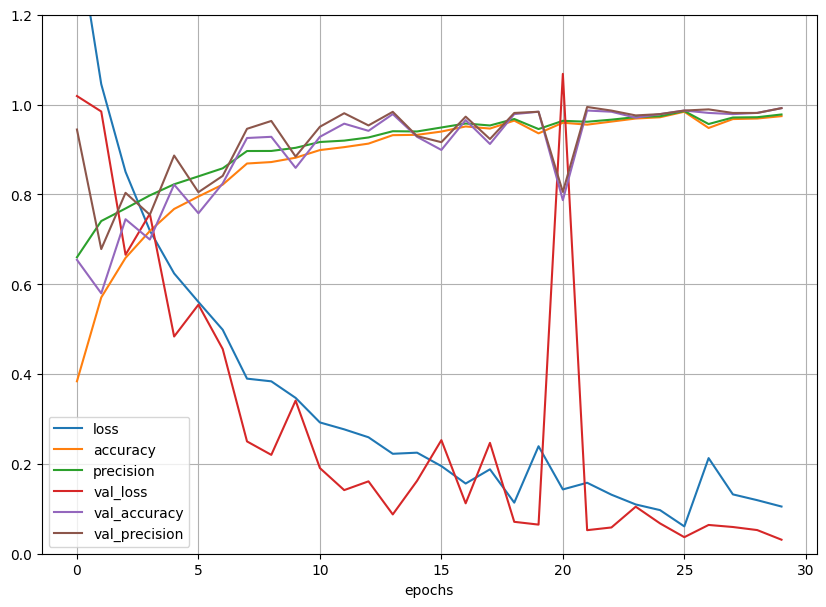

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

### 3.3. Predicción para nuevos ejemplos

In [97]:
# Realizamos la predicción para el subconjunto de pruebas
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)

12/12 [==============================] - 0s 25ms/step - loss: 0.0575 - accuracy: 0.9787 - precision: 0.9839


In [98]:
print('test_acc: ', test_acc)
print('test_prec: ', test_prec)

test_acc:  0.9786666631698608
test_prec:  0.9838709831237793
